# [개념 필사] - 파머완

## CHAPTER 08 <텍스트 분석>

## **8.6 토픽 모델링 - 20 뉴스그룹**


◾**토픽 모델링** : 문서 집합에 숨어 있는 주제를 찾아내는 것. 숨겨진 주제를 효과적으로 표현 가능한 중심 단어를 함축적으로 추출.

* 기법: LSA, LDA (Latent Dirichlet Allocation)

> 🟠 20 뉴스그룹 실습 🟠

* 20개 토픽 -> 8개 주제 추출

* 토픽 별 상위 단어 추출: display_topics 함수

💻 LatentDirichletAllocation 클래스 - 카운트 기반 벡터화만 가능.
```
components_ : 개별 토픽별로 각 word 피처가 얼마나 많이 그 토픽에 할당됐는지에 대한 수치. 높을수록 해당 피처는 그 토픽의 중심 word
```


## **8.8 문서 유사도**

◾**코사인 유사도** : 벡터와 벡터 간의 유사도를 비교할 때, 벡터의 크기보다 벡터의 상호방향이 얼마나 유사한지에 대한 수치.

* 두 벡터 사이의 사잇각 = theta

* cos(theta) = A*B / ||A|| ||B|| (내적 결과를 총 벡터 크기로 L2 정규화 한 것)

* 크기 기반 유사도 지표 보다 희소행렬 기반에서 정확도가 더 높음

* 넘파이 배열 2개에 대한 코사인 유사도 계산: cos_similarity() 함수

💻 sklearn.metrics.pairwise.cosine_similarity API - 코사인 유사도 측정
    
* 파라미터 - (비교 기준이 되는 문서의 피처 행렬, 비교되는 문서의 피처 행렬)
     
* 희소 행렬, 밀집 행렬, 행렬, 배열 모두 가능

* 쌍으로 코사인 유사도 값 제공 (ndarray 형태)


> 🟠 Opinion Review 데이터세트 실습 🟠

(1) 데이터 프레임 로드, 문서 군집화

(2) 호텔 군집화된 데이터 추출, TfidfVectorizer
```
cosisne_simularity()
```

(3) 유사도 높은 순으로 정렬, 시각화


## **8.9 한글 텍스트 처리 - 네이버 영화 평점 감성 분석**

> 한글 NLP 처리의 어려움

* 띄어쓰기, 다양한 조사


> 💻 KoNLPy: 파이썬 대표적인 한글 형태소 패키지

* 형태소 분석: 말뭉치를 형태소 어근 단위로 쪼개고 각 형태소에 품사 태깅


(1) 리뷰텍스트 결측값 -> 공백 변환 / 숫자 -> 정규표현식 사용해 공백 변환

(2) 형태소 단어로 토큰화 💻 Twitter 클래스 이용
```
morphs() - 입력 인자로 들어온 문장을 형태소 단어 형태로 토큰화해 리스트 반환
```
* 형태소 토큰화 반환하는 tw_tokenizer() 함수 생성

(3) TF-IDF 피처 벡터화

(4) 로지스틱 회귀로 분류, GridSearchCV 이용





# [코드 필사]

In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# 8개 주제 추출
cats = ['rec.motorcycles','rec.sport.baseball','comp.graphics','comp.windows.x',
        'talk.politics.mideast','soc.religion.christian','sci.electronics','sci.med']

news_df = fetch_20newsgroups(subset='all',remove=('headers','footers','quotes'),
                             categories=cats,random_state=0)

count_vect = CountVectorizer(max_df=0.95, max_features=1000, min_df=2, stop_words='english', ngram_range=(1,2))
feat_vect = count_vect.fit_transform(news_df.data)
print('CountVectorizer Shape:', feat_vect.shape)

CountVectorizer Shape: (7862, 1000)


In [2]:
lda = LatentDirichletAllocation(n_components=8, random_state=42)
lda.fit(feat_vect)

LatentDirichletAllocation(n_components=8, random_state=42)

In [3]:
print(lda.components_.shape)
lda.components_

(8, 1000)


array([[8.12227755e+01, 1.74831234e+01, 8.92220427e+00, ...,
        1.93832986e+01, 1.04115085e+01, 1.33883121e+01],
       [3.84734291e+02, 1.25907979e-01, 1.73289008e+02, ...,
        1.24845966e+01, 3.68438784e+01, 1.25081020e-01],
       [2.20293485e+00, 1.08399099e+02, 1.63526369e-01, ...,
        7.62906579e+00, 7.28705071e+01, 4.61024313e+01],
       ...,
       [1.25555499e-01, 6.27147168e+01, 1.25123373e-01, ...,
        8.48082334e+01, 1.75393836e+01, 5.58135257e+01],
       [1.77304265e-01, 1.15385462e+01, 1.25029049e-01, ...,
        2.04624502e+02, 1.25073977e-01, 3.84017542e+00],
       [1.25039554e-01, 1.25062547e-01, 1.25001712e-01, ...,
        1.14704238e+02, 1.25125114e-01, 3.86784944e+01]])

In [4]:
## 각 토픽별로 연관도 높은 순으로 word 나열하는 함수 만들기
def display_topics(model, feature_names, no_top_words):
  for topic_index, topic in enumerate(model.components_):
    print('Topic #',topic_index)

    # components_array에서 가장 값이 큰 순으로 정렬했을 때, 그값의 array 인덱스를 반환.
    topic_word_indexes = topic.argsort()[::-1]
    top_indexes = topic_word_indexes[:no_top_words]

    # top_indexes 대상인 인덱스별로 feature_names에 해당하는 word feature 추출 후 join으로 concat
    feature_concat = ' '.join([feature_names[i] for i in top_indexes])
    print(feature_concat)

# CountVectorizer 객체 내의 전체 word의 면칭을 get_features_names()를 통해 추출
feature_names = count_vect.get_feature_names_out()

# 토픽별 가장 연관도가 높은 word를 15개만 추출
display_topics(lda, feature_names, 15)

Topic # 0
image edu graphics file use available window software jpeg ftp version server program data windows
Topic # 1
edu com file output entry 00 program list 03 02 04 address email info line
Topic # 2
israel israeli medical research arab health information disease 1993 cancer patients 10 92 people number
Topic # 3
said people didn went dos dos know just came don told saw say time started children
Topic # 4
armenian turkish armenians jews people turkey government war genocide turks armenia muslim 000 greek muslims
Topic # 5
year think game good don time team better games years hit just 10 baseball like
Topic # 6
like know just don does ve use good want way time think problem make thanks
Topic # 7
god people jesus church think believe christ does say christian christians bible faith did life


In [5]:
## 코사인 유사도로 문서 유사도 구하기
import numpy as np

def cos_similarity(v1, v2):
  dot_product = np.dot(v1,v2)
  l2_norm = (np.sqrt(sum(np.square(v1)))*np.sqrt(sum(np.square(v2))))
  similarity = dot_product / l2_norm

  return similarity

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer # 벡터화 행렬로 변환

doc_list = ['if you take the blue pill, the story ends',
            'if you take thr red pill, you stay in Wonderland',
            'if you take the red pill, I show you how deep the rabbit hole goes']

tfidf_vect_simple = TfidfVectorizer()
feature_vect_simple = tfidf_vect_simple.fit_transform(doc_list)
print(feature_vect_simple.shape)

(3, 19)


In [7]:
# TfidfVectorizer로 transform()한 결과는 희소 행렬이므로 밀집 행렬로 변환
feature_vect_dense = feature_vect_simple.todense()

# 첫번째 문장과 두 번째 문장의 피처 벡터 추출
vect1 = np.array(feature_vect_dense[0]).reshape(-1, )
vect2 = np.array(feature_vect_dense[1]).reshape(-1, )

# 첫번째 문장과 두 번째 문장의 피처 벡터로 두 개 문장의 코사인 유사도 추출
similarity_simple = cos_similarity(vect1, vect2)
print('문장1, 문장 2 Cosine 유사도: {0:.3f}'.format(similarity_simple))

문장1, 문장 2 Cosine 유사도: 0.254


In [8]:
vect1 = np.array(feature_vect_dense[0]).reshape(-1, )
vect3 = np.array(feature_vect_dense[2]).reshape(-1, )
similarity_simple = cos_similarity(vect1, vect3)
print('문장1, 문장 3 Cosine 유사도: {0:.3f}'.format(similarity_simple))

vect2 = np.array(feature_vect_dense[1]).reshape(-1, )
vect3 = np.array(feature_vect_dense[2]).reshape(-1, )
similarity_simple = cos_similarity(vect2, vect3)
print('문장2, 문장 3 Cosine 유사도: {0:.3f}'.format(similarity_simple))

문장1, 문장 3 Cosine 유사도: 0.465
문장2, 문장 3 Cosine 유사도: 0.339


In [10]:
# sklearn.metrics.pairwise.cosine_similarity API 사용
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0], feature_vect_simple)
print(similarity_simple_pair)

[[1.         0.25414421 0.4653398 ]]


In [11]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0], feature_vect_simple[1:])
print(similarity_simple_pair)

[[0.25414421 0.4653398 ]]


In [12]:
similarity_simple_pair = cosine_similarity(feature_vect_simple, feature_vect_simple)
print(similarity_simple_pair)
print('shape:', similarity_simple_pair.shape)

[[1.         0.25414421 0.4653398 ]
 [0.25414421 1.         0.33858866]
 [0.4653398  0.33858866 1.        ]]
shape: (3, 3)


In [17]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from google.colab import drive
drive.mount('/content/drive')

# 필수 NLTK 데이터 다운로드
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')

def LemNormalize(text):
  lemmatizer = WordNetLemmatizer()
  return [lemmatizer.lemmatize(token) for token in word_tokenize(text)]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [18]:
import pandas as pd
import glob, os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

path = r'/content/drive/MyDrive/Colab Notebooks/data/topics'
all_files = glob.glob(os.path.join(path,"*.data"))
filename_list = []
opinion_text = []

for file_ in all_files:
  df = pd.read_table(file_, index_col=None, header=0, encoding='latin1')
  filename_ = file_.split('/')[-1]
  filename = filename_.split('.')[0]
  filename_list.append(filename)
  opinion_text.append(df.to_string())

document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})
tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english',
                             ngram_range=(1,2), min_df=0.05, max_df=0.85 )
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_
document_df['cluster_label'] = cluster_label

/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'u', 'wa'] not in stop_words.
  warnings.warn(


In [19]:
from sklearn.metrics.pairwise import cosine_similarity

# cluster_label=2인 데이터는 호텔로 군집화된 데이터임. DataFrame에서 해당 인덱스를 추출
hotel_indexes = document_df[document_df['cluster_label']==2].index
print('호텔로 클러스터링 된 문서들의 DataFrame Index:', hotel_indexes)

# 호텔로 군집화된 데이터 중 첫번째 문서를 추출해 파일명 표시.
comparison_docname = document_df.iloc[hotel_indexes[0]]['filename']
print('##### 비교 기준 문서명', comparison_docname, '와 타 문서 유사도 #####')

'''document_df에서 추출한 Index 객체를 feature_vect로 입력해 호텔 군집화된 feature_vect 추출
이를 이용해 호텔로 군집화된 문서 중 첫번째 문서와 다른 문서 간의 코사인 유사도 측정'''

similarity_pair = cosine_similarity(feature_vect[hotel_indexes[0]], feature_vect[hotel_indexes])
print(similarity_pair)

호텔로 클러스터링 된 문서들의 DataFrame Index: Index([0, 1, 2, 14, 18, 22, 25, 29, 32, 33, 36, 40, 42, 46, 48, 50], dtype='int64')
##### 비교 기준 문서명 staff_swissotel_chicago 와 타 문서 유사도 #####
[[1.         0.28041323 0.9382141  0.176059   0.066997   0.07347054
  0.1449232  0.1442387  0.27421533 0.28013891 0.24390259 0.25417574
  0.19918506 0.06805947 0.07943886 0.09754824]]


가장 유사도가 큰 파일명 및 유사도:
 filename      staff_bestwestern_hotel_sfo
similarity                       0.938214
Name: 2, dtype: object


Text(0.5, 1.0, 'staff_swissotel_chicago')

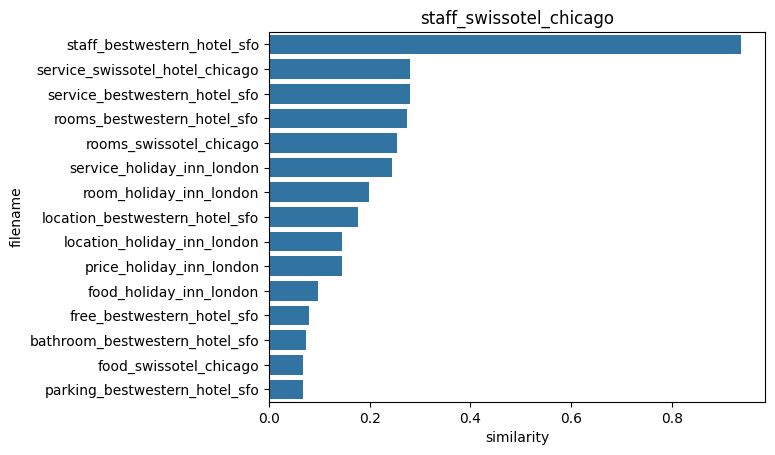

In [20]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 첫번째 문서와 타 문서간 유사도가 큰 순으로 정렬한 인덱스 추출하되 자기 자신은 제외.
sorted_index = similarity_pair.argsort()[:,::-1]
sorted_index = sorted_index[:,1:]

# 유사도가 큰 순으로 hotel_indexes를 추출하여 재정렬.
hotel_sorted_indexes = hotel_indexes[sorted_index.reshape(-1)]

# 유사도가 큰 순으로 유사도 값을 재정렬하되 자기 자신은 제외
hotel_1_sim_value = np.sort(similarity_pair.reshape(-1))[::-1]
hotel_1_sim_value = hotel_1_sim_value[1:]

# 유사도가 큰 순으로 정렬된 인덱스와 유사도 값을 이용해 파일명과 유사도값을 막대 그래프로 시각화
hotel_1_sim_df = pd.DataFrame()
hotel_1_sim_df['filename'] = document_df.iloc[hotel_sorted_indexes]['filename']
hotel_1_sim_df['similarity'] = hotel_1_sim_value
print('가장 유사도가 큰 파일명 및 유사도:\n', hotel_1_sim_df.iloc[0,:])

sns.barplot(x='similarity', y='filename', data=hotel_1_sim_df)
plt.title(comparison_docname)

In [21]:
!pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 57.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 495.9/495.9 kB 30.4 MB/s eta 0:00:00


In [22]:
import pandas as pd

train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/ratings_train.txt', sep='\t', encoding='utf-8')
train_df.head(3)

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0


In [23]:
train_df['label'].value_counts()

,count
label,
0,75173
1,74827


In [25]:
import re

train_df = train_df.fillna('')
# 정규 표현식을 이용해 숫자를 공백으로 변경(정규 표현식으로 \d는 숫자를 의미함.)
train_df['document'] = train_df['document'].apply(lambda x: re.sub(r"\d+", " ", x))

# 테스트 데이터 세트를 로딩하고 동일하게 Null 및 숫자를 공백으로 변환
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/ratings_test.txt', sep='\t', encoding='utf-8')
test_df = test_df.fillna(' ')
test_df['document'] = test_df['document'].apply(lambda x: re.sub(r"\d+", " ", x))

# id 칼럼 삭제 수행
train_df.drop('id', axis=1, inplace=True)
test_df.drop('id', axis=1, inplace=True)

In [26]:
from konlpy.tag import Twitter

twitter = Twitter()
def tw_tokenizer(text):
  # 입력 인자로 들어온 텍스트를 형태소 단어로 토큰화해 리스트 형태로 반환
  tokens_ko = twitter.morphs(text)
  return tokens_ko

/usr/local/lib/python3.12/dist-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Twitter 객체의 morphs() 객체를 이용한 tokenizer, ngram_range(1,2)
tfidf_vect = TfidfVectorizer(tokenizer=tw_tokenizer, ngram_range=(1,2), min_df=3, max_df=0.9)
tfidf_vect.fit(train_df['document'])
tfidf_matrix_train = tfidf_vect.transform(train_df['document'])

/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [28]:
# 로지스틱 회귀를 이용해 감성 분석 분류 수행
lg_clf = LogisticRegression(random_state=0, solver='liblinear')

# 파라미터 C 최적화를 위해 GridSearchCV를 이용.
params = {'C':[1,3.5,4.5,5.5,10]}
grid_cv = GridSearchCV(lg_clf, param_grid=params, cv=3, scoring='accuracy', verbose=1)
grid_cv.fit(tfidf_matrix_train, train_df['label'])
print(grid_cv.best_params_, round(grid_cv.best_score_, 4))

Fitting 3 folds for each of 5 candidates, totalling 15 fits
{'C': 3.5} 0.8593


In [29]:
from sklearn.metrics import accuracy_score

# 학습 데이터를 적용한 TfidfVectorizer를 이용해 테스트 데이터를 TF-IDF 값으로 피처 변환함.
tfidf_matrix_test = tfidf_vect.transform(test_df['document'])

# classifier는 GridSearchCV에서 최적 파라미터로 학습된 classifier를 그대로 이용
best_estimator = grid_cv.best_estimator_
preds = best_estimator.predict(tfidf_matrix_test)

print('Logistic Regression 정확도:', accuracy_score(test_df['label'], preds))

Logistic Regression 정확도: 0.86172
